In [1]:
import glob
import numpy as np
import pylab as pl
import astropy.io.fits as fits

from astropy.table import Table, vstack, join
from desimodel.footprint import is_point_in_desi
from desimodel.focalplane.geometry import get_tile_radius_deg
from matplotlib.pyplot import figure
from desitarget.geomask import circles

In [2]:
tpath = '/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-sv1.ecsv'

In [3]:
tiles = Table.read(tpath)
tiles

<Table length=170>
TILEID CENTERID  PASS    RA     DEC   ...  STATUS  EBV_MED DONEFRAC AVAILABLE
                        deg     deg   ...                                    
int32   int32   int32 float64 float64 ...   str8   float32 float32     bool  
------ -------- ----- ------- ------- ... -------- ------- -------- ---------
 80605    80605     8  36.448  -4.601 ...   obsend   0.026   5.4000     False
 80606    80606     7  36.448  -4.501 ...   obsend   0.026   4.1000     False
 80607    80607     8 106.740  56.100 ...   obsend   0.053  10.7000      True
 80608    80608     7 106.740  56.200 ...   obsend   0.053   8.1000      True
 80609    80609     8 150.120   2.206 ...   obsend   0.023   4.0000      True
 80610    80610     7 150.120   2.306 ...   obsend   0.022   5.1000      True
 80611    80611    10  35.220  30.300 ...   obsend   0.088   0.7500     False
 80612    80612    10  66.680  -5.240 ...   obsend   0.040   1.0500     False
 80613    80613    10 106.740  56.100 ...   obsend   0.053   1.0500      True
   ...      ...   ...     ...     ... ...      ...     ...      ...       ...
 80893    80893    14 219.000  15.000 ...   obsend   0.022   1.0000      True
 80894    80894    11 219.000  15.000 ...   obsend   0.022   1.0000      True
 80895    80895    14 226.000  32.375 ...   obsend   0.017   1.0000      True
 80896    80896    11 226.000  32.375 ...   obsend   0.017   0.7500      True
 80897    80897    14 235.000  32.375 ... obsstart   0.029   0.5000      True
 80898    80898    11 235.000  32.375 ... obsstart   0.029   0.5000      True
 80899    80899    14 241.000  15.000 ...   obsend   0.042   1.2500      True
 80900    80900    11 241.000  15.000 ... obsstart   0.042   0.7750      True
 80901    80901    14 247.800  32.375 ... obsstart   0.023   0.7500      True
 80902    80902    11 247.800  32.375 ...   obsend   0.023   1.0000      True

In [4]:
np.unique(tiles['PROGRAM'].data)

array(['cmxm33', 'sv1_cmxelg', 'sv1_cmxlrgqso', 'sv1bgsmws', 'sv1elg',
       'sv1elgqso', 'sv1lrgqso', 'sv1lrgqso2', 'sv1m31'], dtype='<U13')

In [5]:
tiles = tiles[tiles['PROGRAM'] == 'sv1bgsmws']
tiles

<Table length=73>
TILEID CENTERID  PASS    RA     DEC   ...  STATUS  EBV_MED DONEFRAC AVAILABLE
                        deg     deg   ...                                    
int32   int32   int32 float64 float64 ...   str8   float32 float32     bool  
------ -------- ----- ------- ------- ... -------- ------- -------- ---------
 80611    80611    10  35.220  30.300 ...   obsend   0.088   0.7500     False
 80612    80612    10  66.680  -5.240 ...   obsend   0.040   1.0500     False
 80613    80613    10 106.740  56.100 ...   obsend   0.053   1.0500      True
 80614    80614    10 154.100  -1.375 ...   obsend   0.044   0.5250      True
 80616    80616    10 356.000  29.000 ...   obsend   0.109   0.5500     False
 80617    80617    10   5.000  28.000 ...   obsend   0.036   1.0250     False
 80618    80618    10 114.221  38.469 ...   obsend   0.056   1.0750      True
 80619    80619    10 144.000  65.000 ...   obsend   0.073   0.8000      True
 80624    80624    10   4.000  10.000 ...   obsend   0.154   0.3250     False
   ...      ...   ...     ...     ... ...      ...     ...      ...       ...
 80733        0    10 199.100  18.300 ...   obsend   0.000   1.3000      True
 80734        0    10 229.640   2.580 ...   obsend   0.042   1.8250      True
 80735        0    10 250.420  36.960 ...   obsend   0.017   1.5500      True
 80736        0    10 259.280  43.640 ...   obsend   0.020   1.7750      True
 80737        0    10 153.260  -1.110 ... obsstart   0.035   0.2500      True
 80738        0    10 260.070  58.420 ...   obsend   0.027   2.0750      True
 80739        0    10 131.000   0.500 ...    unobs   0.035   0.0000      True
 80740        0    10 135.000   0.500 ... obsstart   0.037   0.3000      True
 80741        0    10 139.000   0.500 ... obsstart   0.029   0.2750      True
 80742        0    10 150.100   3.000 ... obsstart   0.021   0.5500      True

In [6]:
tiles[tiles['TILEID'].data == 80657]

<Table length=1>
TILEID CENTERID  PASS    RA     DEC   ... STATUS EBV_MED DONEFRAC AVAILABLE
                        deg     deg   ...                                  
int32   int32   int32 float64 float64 ...  str8  float32 float32     bool  
------ -------- ----- ------- ------- ... ------ ------- -------- ---------
 80657    80657    10 158.128  10.360 ... obsend   0.032   0.7500      True

In [7]:
tiles = Table.read('/global/cfs/cdirs/desi/spectro/redux/everest/tiles-everest.csv')
tiles

<Table length=1591>
TILEID SURVEY  FAPRGRM   FAFLAVOR  NEXP ... MINTFRAC LASTNIGHT  QA  USER
int64   str7    str16     str19   int64 ... float64    int64   str6 str7
------ ------ --------- --------- ----- ... -------- --------- ---- ----
     1    sv3      dark   sv3dark     3 ...      0.9  20210406 none none
     2    sv3      dark   sv3dark     2 ...      0.9  20210407 none none
     3    sv3      dark   sv3dark     1 ...      0.9  20210409 none none
     4    sv3      dark   sv3dark     1 ...      0.9  20210410 none none
     5    sv3      dark   sv3dark     2 ...      0.9  20210412 none none
     6    sv3      dark   sv3dark     2 ...      0.9  20210417 none none
     7    sv3      dark   sv3dark     1 ...      0.9  20210429 none none
     8    sv3      dark   sv3dark     2 ...      0.9  20210430 none none
     9    sv3      dark   sv3dark     2 ...      0.9  20210502 none none
    10    sv3      dark   sv3dark     3 ...      0.9  20210503 none none
   ...    ...       ...       ...   ... ...      ...       ...  ...  ...
 82068    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82069    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82070    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82071    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82072    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82073    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82074    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82075    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82076    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none
 82077    cmx dithfocus dithfocus     1 ...      0.9  20210423 none none

In [8]:
np.unique(tiles['FAPRGRM'].data)

array(['backup', 'backup1', 'bgsmws', 'bright', 'dark', 'dc3r2',
       'dithfocus', 'dithlost', 'dithprec', 'elg', 'elgqso', 'lrgqso',
       'lrgqso2', 'm31', 'm33', 'mwclusgaldeep', 'praesepe', 'rosette',
       'scndcosmos', 'scndhetdex', 'ssv', 'umaii', 'unwisebluebright',
       'unwisebluefaint', 'unwisegreen'], dtype='<U16')

In [9]:
tiles = tiles[tiles['FAPRGRM'] == 'bgsmws']
tiles.sort('EFFTIME_GFA')
tiles

<Table length=50>
TILEID SURVEY FAPRGRM  FAFLAVOR  NEXP ... GOALTYPE MINTFRAC LASTNIGHT  QA  USER
int64   str7   str16    str19   int64 ...   str7   float64    int64   str6 str7
------ ------ ------- --------- ----- ... -------- -------- --------- ---- ----
 80665    sv1  bgsmws sv1bgsmws     9 ...   bright      0.9  20210322 none none
 80660    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210131 none none
 80659    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210304 none none
 80657    sv1  bgsmws sv1bgsmws     7 ...   bright      0.9  20210331 none none
 80650    sv1  bgsmws sv1bgsmws    22 ...   bright      0.9  20210322 none none
 80645    sv1  bgsmws sv1bgsmws    13 ...   bright      0.9  20210205 none none
 80626    sv1  bgsmws sv1bgsmws     2 ...   bright      0.9  20210203 none none
 80635    sv1  bgsmws sv1bgsmws     5 ...   bright      0.9  20210105 none none
 80637    sv1  bgsmws sv1bgsmws     5 ...   bright      0.9  20210221 none none
 80740    sv1  bgsmws sv1bgsmws     5 ...   bright      0.9  20210328 none none
   ...    ...     ...       ...   ... ...      ...      ...       ...  ...  ...
 80662    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210322 none none
 80661    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210322 none none
 80616    sv1  bgsmws sv1bgsmws    18 ...   bright      0.9  20201223 none none
 80646    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210205 none none
 80666    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210402 none none
 80653    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210115 none none
 80655    sv1  bgsmws sv1bgsmws    17 ...   bright      0.9  20210322 none none
 80618    sv1  bgsmws sv1bgsmws    35 ...   bright      0.9  20210328 none none
 80663    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210322 none none
 80613    sv1  bgsmws sv1bgsmws    30 ...   bright      0.9  20210324 none none

In [10]:
utids, cnts = np.unique(tiles['TILEID'].data, return_counts=True)

In [11]:
utids

array([80611, 80612, 80613, 80614, 80616, 80617, 80618, 80619, 80624,
       80626, 80627, 80628, 80629, 80632, 80633, 80635, 80636, 80637,
       80638, 80639, 80640, 80641, 80642, 80643, 80644, 80645, 80646,
       80647, 80648, 80649, 80650, 80651, 80652, 80653, 80654, 80655,
       80656, 80657, 80658, 80659, 80660, 80661, 80662, 80663, 80664,
       80665, 80666, 80740, 80741, 80742])

In [12]:
cnts.max()

1

In [13]:
len(utids)

50

In [14]:
np.count_nonzero(tiles['ZDONE'] == 'false')

15

In [15]:
np.count_nonzero(tiles['EFFTIME_SPEC'] < 600.)

13

In [16]:
np.count_nonzero(tiles['EFFTIME_GFA'] < 600.)

20

In [17]:
np.count_nonzero(tiles['OBSSTATUS'] == 'obsstart')

13

In [18]:
tiles = tiles[tiles['OBSSTATUS'] == 'obsend']
tiles

<Table length=37>
TILEID SURVEY FAPRGRM  FAFLAVOR  NEXP ... GOALTYPE MINTFRAC LASTNIGHT  QA  USER
int64   str7   str16    str19   int64 ...   str7   float64    int64   str6 str7
------ ------ ------- --------- ----- ... -------- -------- --------- ---- ----
 80665    sv1  bgsmws sv1bgsmws     9 ...   bright      0.9  20210322 none none
 80660    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210131 none none
 80659    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210304 none none
 80657    sv1  bgsmws sv1bgsmws     7 ...   bright      0.9  20210331 none none
 80650    sv1  bgsmws sv1bgsmws    22 ...   bright      0.9  20210322 none none
 80645    sv1  bgsmws sv1bgsmws    13 ...   bright      0.9  20210205 none none
 80624    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210109 none none
 80614    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210331 none none
 80611    sv1  bgsmws sv1bgsmws    13 ...   bright      0.9  20201222 none none
 80632    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210222 none none
   ...    ...     ...       ...   ... ...      ...      ...       ...  ...  ...
 80662    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210322 none none
 80661    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210322 none none
 80616    sv1  bgsmws sv1bgsmws    18 ...   bright      0.9  20201223 none none
 80646    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210205 none none
 80666    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210402 none none
 80653    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210115 none none
 80655    sv1  bgsmws sv1bgsmws    17 ...   bright      0.9  20210322 none none
 80618    sv1  bgsmws sv1bgsmws    35 ...   bright      0.9  20210328 none none
 80663    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210322 none none
 80613    sv1  bgsmws sv1bgsmws    30 ...   bright      0.9  20210324 none none

In [19]:
ntileobs = np.count_nonzero(tiles['OBSSTATUS'] == 'obsend')
ntileobs

37

In [20]:
trad = get_tile_radius_deg()
trad

1.6280324520485583

In [21]:
tarea = np.pi * trad**2.
tarea

8.326758859738527

In [22]:
sv1_area = tarea * ntileobs
sv1_area

308.0900778103255

In [23]:
# 40% chance of assignment in MINISV (true of restricted reach in SV1?)
308. * 0.40

123.2

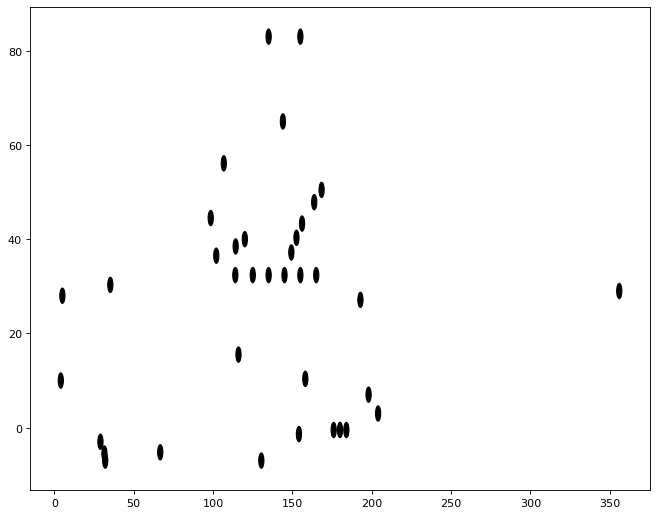

In [24]:
figure(figsize=(10, 8), dpi=80)

circles(tiles['TILERA'].data, tiles['TILEDEC'].data, s=1.628, c='k', vmin=None, vmax=None)

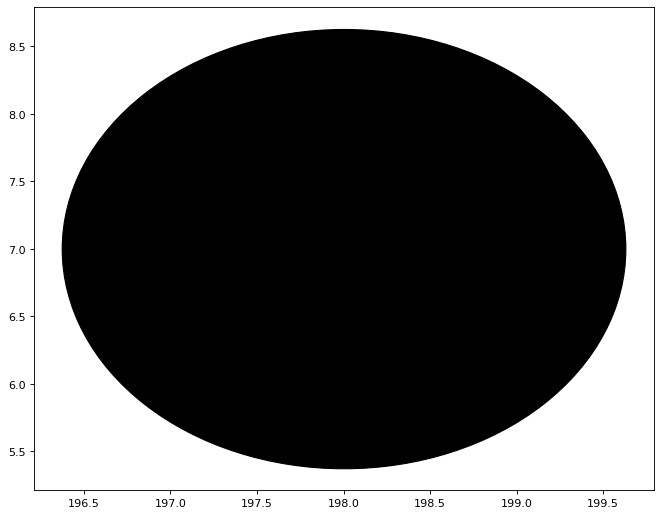

In [25]:
figure(figsize=(10, 8), dpi=80)

circles(tiles['TILERA'].data[0], tiles['TILEDEC'].data[0], s=1.628, c='k', vmin=None, vmax=None)

In [26]:
np.sort(tiles['EFFTIME_GFA'].data)

array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,  574.7,  649.2,
        687.8,  717.9,  785.4,  839.6,  890.6,  997. , 1011.9, 1018.6,
       1041.1, 1196.7, 1266.5, 1269.2, 1347.3, 1357. , 1406.9, 1434.2,
       1467.6, 1471.5, 1574. , 1574.9, 1596. , 1608.1, 1663.6, 1726.1,
       1875.6, 1939.8, 2262.1, 2296.2, 2812.5])

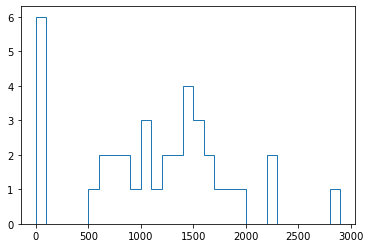

In [27]:
_ = pl.hist(tiles['EFFTIME_GFA'].data, bins=np.arange(0.0, 3000., 100.), histtype='step')

##  LSS SV1 randoms

In [28]:
tiles

<Table length=37>
TILEID SURVEY FAPRGRM  FAFLAVOR  NEXP ... GOALTYPE MINTFRAC LASTNIGHT  QA  USER
int64   str7   str16    str19   int64 ...   str7   float64    int64   str6 str7
------ ------ ------- --------- ----- ... -------- -------- --------- ---- ----
 80665    sv1  bgsmws sv1bgsmws     9 ...   bright      0.9  20210322 none none
 80660    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210131 none none
 80659    sv1  bgsmws sv1bgsmws    15 ...   bright      0.9  20210304 none none
 80657    sv1  bgsmws sv1bgsmws     7 ...   bright      0.9  20210331 none none
 80650    sv1  bgsmws sv1bgsmws    22 ...   bright      0.9  20210322 none none
 80645    sv1  bgsmws sv1bgsmws    13 ...   bright      0.9  20210205 none none
 80624    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210109 none none
 80614    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210331 none none
 80611    sv1  bgsmws sv1bgsmws    13 ...   bright      0.9  20201222 none none
 80632    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210222 none none
   ...    ...     ...       ...   ... ...      ...      ...       ...  ...  ...
 80662    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210322 none none
 80661    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210322 none none
 80616    sv1  bgsmws sv1bgsmws    18 ...   bright      0.9  20201223 none none
 80646    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210205 none none
 80666    sv1  bgsmws sv1bgsmws    14 ...   bright      0.9  20210402 none none
 80653    sv1  bgsmws sv1bgsmws    11 ...   bright      0.9  20210115 none none
 80655    sv1  bgsmws sv1bgsmws    17 ...   bright      0.9  20210322 none none
 80618    sv1  bgsmws sv1bgsmws    35 ...   bright      0.9  20210328 none none
 80663    sv1  bgsmws sv1bgsmws    12 ...   bright      0.9  20210322 none none
 80613    sv1  bgsmws sv1bgsmws    30 ...   bright      0.9  20210324 none none

In [29]:
fbas = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-*')
fbas = sorted(fbas)
fbas

['/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080605.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080606.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080607.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080608.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080609.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080610.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080611.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080612.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080613.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080614.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080616.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080617.fits',
 '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080618.fits',
 '/global/cfs/cdirs/desi/

In [30]:
keep = [fits.open(fba)[0].header['TILEID'] in tiles['TILEID'] for fba in fbas]

In [31]:
np.mean(keep)

0.34579439252336447

In [32]:
fbas = np.array(fbas)[keep]

In [33]:
fbas

array(['/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080611.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080612.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080613.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080614.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080616.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080617.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080618.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080619.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080624.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080629.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080632.fits',
       '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080633.fits',
       '/global/cfs/cdirs/de

In [34]:
len(fbas)

37

In [35]:
fba = fits.open(fbas[0])

In [36]:
fba.info()

Filename: /global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080611.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  FASSIGN       1 BinTableHDU     65   5020R x 14C   [J, K, J, J, E, I, J, 3A, D, D, K, B, E, E]   
  2  FTARGETS      1 BinTableHDU     53   12935R x 8C   [K, D, D, K, B, J, D, J]   
  3  FAVAIL        1 BinTableHDU     43   12935R x 3C   [J, J, K]   


In [37]:
nrow = 0

for i, fba in enumerate(fbas):
    fba = fits.open(fba)
    
    print('{:d}\t{:d}'.format(i, len(fba['FAVAIL'].data['TARGETID'])))
    
    nrow += len(fba['FAVAIL'].data['TARGETID'])
    
print()
print(nrow)

0	12935
1	12745
2	12896
3	12769
4	12781
5	12719
6	12816
7	12965
8	12790
9	12786
10	12646
11	13095
12	12872
13	12679
14	12753
15	12819
16	12696
17	12720
18	12793
19	12744
20	12808
21	13053
22	12556
23	12888
24	12744
25	12762
26	12841
27	12675
28	12950
29	12864
30	12710
31	12770
32	12991
33	12937
34	12931
35	12867
36	12580

473946


In [38]:
37 * 12991 / 2500.

192.2668

In [39]:
for i, fba in enumerate(fbas):
    tileid = fba.split('/')[-1].split('-')[-1].replace('.fits','')
    
    x  = Table(fits.open(fba)['FAVAIL'].data) 
    x['TILEID']= np.int(tileid)
    x.sort('TARGETID')
    
    x = x[:10]
 
    hdr = fits.open(fba)[0].header

    print('{:d}\t{:f}\t{:f}'.format(hdr['TILEID'], hdr['TILERA'], hdr['TILEDEC']))
    
    if i > 5:
        break

80611	35.220000	30.300000
80612	66.680000	-5.240000
80613	106.740000	56.100000
80614	154.100000	-1.375000
80616	356.000000	29.000000
80617	5.000000	28.000000
80618	114.221000	38.469000


In [40]:
sfbas = []

for fba in fbas:
   # /global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/random0/fba-080642.fits
   tileid = fba.split('/')[-1].split('-')[-1].replace('.fits','')
    
   x  = Table(fits.open(fba)['FAVAIL'].data) 
   x['TILEID']= np.int(tileid) 

   y  = Table(fits.open(fba)['FTARGETS'].data)
    
   x  = join(x, y['TARGETID', 'TARGET_RA', 'TARGET_DEC'], join_type='left', keys='TARGETID') 
    
   sfbas.append(x)

sfbas  = vstack(sfbas)
sfbas

<Table length=473946>
LOCATION FIBER TARGETID TILEID     TARGET_RA          TARGET_DEC    
 int32   int32  int64   int64       float64            float64      
-------- ----- -------- ------ ------------------ ------------------
    6484  3078        0  80611  36.12240363249487 31.686513791782197
    6483  3087        6  80611  36.09386490566186 31.720289540184925
    6485  3470       10  80611  36.16870419175712 31.650274022341765
    6486  3491       16  80611  36.19044462206948 31.632625616245143
    6503  3466       18  80611  36.22160922411851 31.632294894452723
    6503  3466       21  80611 36.225828567627154 31.637137170216384
    6503  3466       22  80611 36.223382642824234 31.620836470753222
    6503  3466       23  80611  36.23157644057259  31.63582175042567
    6503  3466       26  80611  36.23650893611502  31.62923547536745
    6487  3499       28  80611 36.224339070564334 31.596623513111158
     ...   ...      ...    ...                ...                ...
    3524  1865    41184  80666 202.58546215986445  3.685960021455966
    3523  1852    41186  80666 202.57445824295928  3.668991329489878
    3524  1865    41188  80666 202.58406629579807   3.68723405648866
    3523  1852    41190  80666  202.5681958804885 3.6583405630580415
    3523  1852    41192  80666 202.56135247950206 3.6539560785179135
    3523  1852    41193  80666 202.56183728224295  3.665993209183936
    3523  1852    41194  80666 202.56034181051817 3.6687193167860985
    3523  1852    41195  80666 202.55886148660719  3.653711890226091
    3524  1865    41209  80666 202.59831361445424 3.7020769069656705
    3524  1865    41211  80666 202.59257457305827 3.7063992417425893

In [41]:
type(sfbas['TARGETID'].data[0])

numpy.int64

In [42]:
urandid, cnts = np.unique(sfbas['TARGETID'].data, return_counts=True)

In [43]:
cnts.max()

23

In [44]:
len(urandid) / 2500.

16.7424

In [45]:
uids, idx = np.unique(sfbas['TARGETID'].data, return_index=True)

In [46]:
idx

array([     0, 192247, 140848, ..., 384157, 384158, 384159])

In [47]:
dup = np.arange(len(sfbas))
dup = dup[~np.isin(dup, idx)]

In [48]:
len(dup), len(sfbas) - len(idx), len(sfbas)

(432090, 432090, 473946)

In [49]:
dup = sfbas[dup]
dup

<Table length=432090>
LOCATION FIBER TARGETID TILEID     TARGET_RA          TARGET_DEC    
 int32   int32  int64   int64       float64            float64      
-------- ----- -------- ------ ------------------ ------------------
    8524  4370      111  80612   68.1038682535264 -5.928239454195679
    8512  4392      124  80612  68.04151740888724 -5.980833616948158
    8525  4378      133  80612  68.08526231546209 -5.967461412813926
    8512  4392      142  80612  68.04572064256737 -5.961076537681671
    8511  4360      143  80612  68.05150840482979 -5.937875459584199
    8512  4392      146  80612  68.03884802558579 -5.966883410835705
    8512  4392      154  80612  68.03269520662697 -5.976522728336788
    8495  4394      165  80612  68.01285076087657 -5.933952051417105
    8523  4373      204  80612  68.12663253229682  -5.88869281038862
    8523  4373      210  80612   68.1127924341588 -5.904986713548502
     ...   ...      ...    ...                ...                ...
    3524  1865    41184  80666 202.58546215986445  3.685960021455966
    3523  1852    41186  80666 202.57445824295928  3.668991329489878
    3524  1865    41188  80666 202.58406629579807   3.68723405648866
    3523  1852    41190  80666  202.5681958804885 3.6583405630580415
    3523  1852    41192  80666 202.56135247950206 3.6539560785179135
    3523  1852    41193  80666 202.56183728224295  3.665993209183936
    3523  1852    41194  80666 202.56034181051817 3.6687193167860985
    3523  1852    41195  80666 202.55886148660719  3.653711890226091
    3524  1865    41209  80666 202.59831361445424 3.7020769069656705
    3524  1865    41211  80666 202.59257457305827 3.7063992417425893

In [50]:
100. * len(dup) / len(sfbas)

91.16861414591536

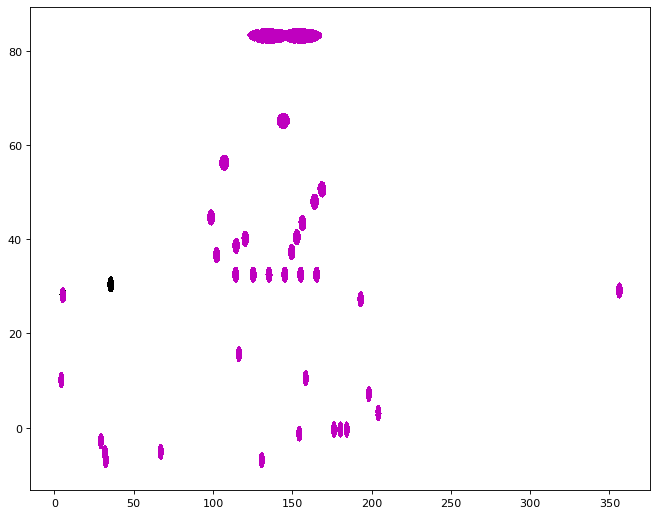

In [51]:
figure(figsize=(10, 8), dpi=80)

pl.plot(sfbas['TARGET_RA'].data, sfbas['TARGET_DEC'].data, marker=',', lw=0.0, c='k')
pl.plot(  dup['TARGET_RA'].data,   dup['TARGET_DEC'].data, marker=',', lw=0.0, c='m')

In [52]:
for i, tileid in enumerate(np.unique(sfbas['TILEID'].data)):
    in_tile  = (sfbas['TILEID'].data == tileid)
    
    tids     = sfbas['TARGETID'].data[in_tile].astype(np.int64)
    tids     = np.sort(tids)

    if i == 0:
        control = tids

    print(tileid, len(tids), 100. * np.count_nonzero(np.isin(tids, control)) / len(tids))

80611 12935 100.0
80612 12745 30.961161239701845
80613 12896 31.12593052109181
80614 12769 30.01018090688386
80616 12781 30.4045066896174
80617 12719 30.93010456796918
80618 12816 31.44506866416979
80619 12965 30.43578866178172
80624 12790 31.016419077404223
80629 12786 30.41608008759581
80632 12646 31.67009331013759
80633 13095 30.866743031691485
80641 12872 30.593536357986327
80642 12679 30.58600836028078
80643 12753 30.643770093311378
80644 12819 30.91504797566113
80645 12696 31.19092627599244
80646 12720 31.32075471698113
80647 12793 30.915344328929883
80649 12744 31.136220966729443
80650 12808 30.676139912554653
80651 13053 30.820501034245
80652 12556 30.77413188913667
80653 12888 30.8504034761018
80654 12744 31.544256120527308
80655 12762 30.833725121454318
80656 12841 31.158009500817695
80657 12675 30.90335305719921
80658 12950 31.335907335907336
80659 12864 31.428793532338307
80660 12710 31.966955153422504
80661 12770 31.605324980422868
80662 12991 31.64498498960819
80663 12937

# Done.